# **Kami menggunakan data *Breast Cancer Wisconsin (Diagnostic)* Dataset.**

Dataset ini memiliki 569 sampel (pasien), di mana setiap pasien memiliki 30 fitur atau karakteristik yang diukur dari gambar sel hasil biopsi. Fitur yang dibuat diantaranya adalah:

1.   Radius: Jarak dari pusat ke titik-titik di sekeliling sel.
2.   Texture: Variasi warna dalam sel
1.   Perimeter & Area: Ukuran fisik sel.
2.   Smoothness: Tingkat kehalusan tepi sel.
1.   Concavity: Seberapa menjorok ke dalam bagian tepi sel.

**Masalah yang dihadapi:**

Dataset kanker payudara (*Breast Cancer Wisconsin*) memiliki 30 fitur/dimensi (seperti radius, tekstur, area sel, dll). Sangat sulit bagi manusia untuk memvisualisasikan data dalam 30 dimensi sekaligus untuk melihat pola perbedaan antara sel ganas (malignant) dan jinak (benign).


**Mengapa Dimensionality Reduction dibutuhkan?**

Karena Kita perlu mereduksi (mengurangi) 30 fitur tersebut menjadi hanya 2 dimensi agar bisa diplot ke dalam grafik 2D. Tujuannya adalah untuk melihat apakah kedua jenis sel tersebut membentuk kelompok (cluster) yang terpisah secara alami.

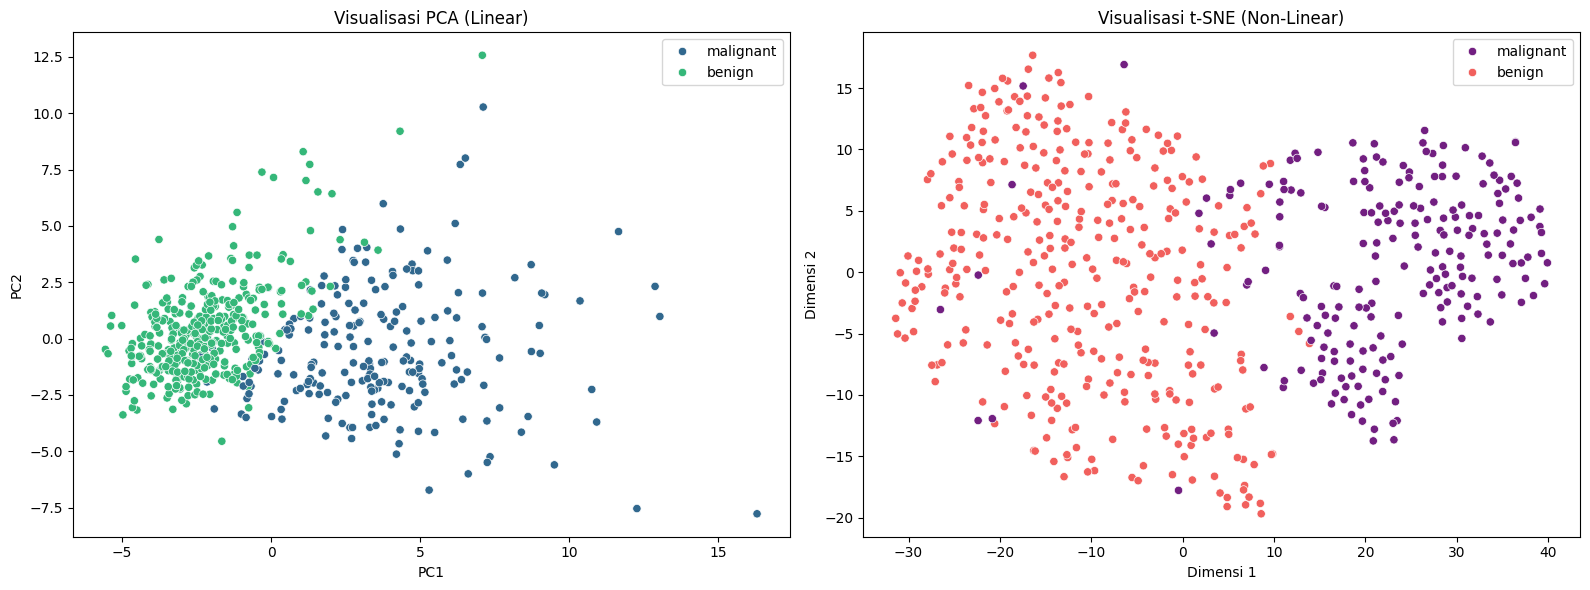

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Standardisasi (Wajib untuk PCA)
X_scaled = StandardScaler().fit_transform(X)

# 2. Implementasi PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Implementasi t-SNE (2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 4. Visualisasi
plt.figure(figsize=(16, 6))

# Plot PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=[target_names[i] for i in y], palette='viridis')
plt.title('Visualisasi PCA (Linear)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=[target_names[i] for i in y], palette='magma')
plt.title('Visualisasi t-SNE (Non-Linear)')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')

plt.tight_layout()
plt.show()

**Reduksi ke 2D:**

Bagian pca = PCA(n_components=2) merangkum 30 kolom menjadi 2 komponen utama (PC1 dan PC2). PCA bekerja secara linear dengan mencari arah yang memiliki varians (sebaran data) paling besar.


**Hasilnya Adalah:**

PCA mencoba mempertahankan struktur global data. Jika titik-titik antar kelas terlihat tumpang tindih, itu berarti hubungan linear saja tidak cukup untuk memisahkan kedua jenis kanker tersebut dengan sempurna.

# **Penerapan t-SNE (t-Distributed Stochastic Neighbor Embedding)**

**Reduksi ke 2D**

Bagian tsne = TSNE(n_components=2, ...) juga mereduksi data ke 2 dimensi, namun dengan pendekatan non-linear.

**Pola/Cluster yang terbentuk**

Berbeda dengan PCA, t-SNE fokus pada struktur lokal. Ia mencoba memastikan data yang mirip tetap berdekatan dan data yang berbeda berjauhan. Biasanya, t-SNE akan menghasilkan kelompok (cluster) yang jauh lebih terpisah dan jelas dibandingkan PCA.

**Perbedaan Hasil PCA dan t-SNE:**

PCA biasanya terlihat lebih "tersebar" dan mungkin ada beberapa titik yang menumpuk di tengah karena ia hanya menarik garis lurus (linear) untuk menyederhanakan data.

t-SNE biasanya membentuk gumpalan atau "pulau" yang lebih tegas karena ia mampu menangkap pola hubungan yang rumit (non-linear).

**Metode mana yang lebih sesuai?**

Untuk Visualisasi dan Eksplorasi, t-SNE seringkali lebih disukai karena kemampuannya memisahkan kelas dengan sangat jelas dalam ruang 2D.

Namun, jika tujuannya adalah Efisiensi dan Kecepatan untuk pemrosesan data selanjutnya (seperti feeding ke model machine learning lain), PCA seringkali lebih stabil karena hasilnya konsisten (deterministik) dan jauh lebih cepat diproses.